In [7]:
import pandas as pd

In [8]:
injections_per_fm = 250

In [9]:
df = pd.read_csv("./results_stdout.csv")
df.columns = ["Group", "Type", *df.columns[2:]]
df

,Group,Type,Output error,Classification error,Other error
0,gp,FLIP_SINGLE_BIT,4.0,0.4,2.8
1,gp,RANDOM_VALUE,36.0,2.4,4.4
2,ld,FLIP_SINGLE_BIT,3.2,0.4,0.0
3,ld,RANDOM_VALUE,40.8,3.2,0.4
4,fp32,FLIP_SINGLE_BIT,3.6,0.4,0.0
5,fp32,RANDOM_VALUE,36.4,2.0,0.0
6,fp32,WARP_RANDOM_VALUE,58.8,3.2,0.0


<Axes: title={'center': 'LDs error measurements'}, xlabel='Type', ylabel='error rate %'>

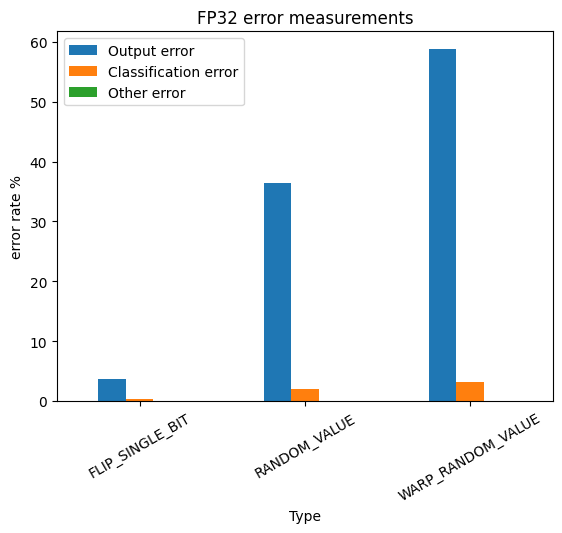

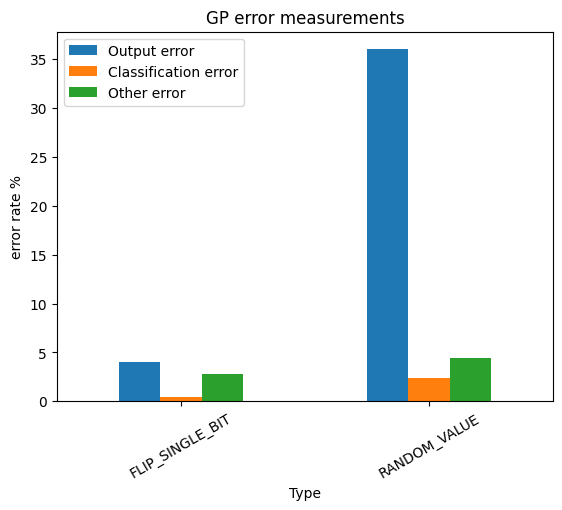

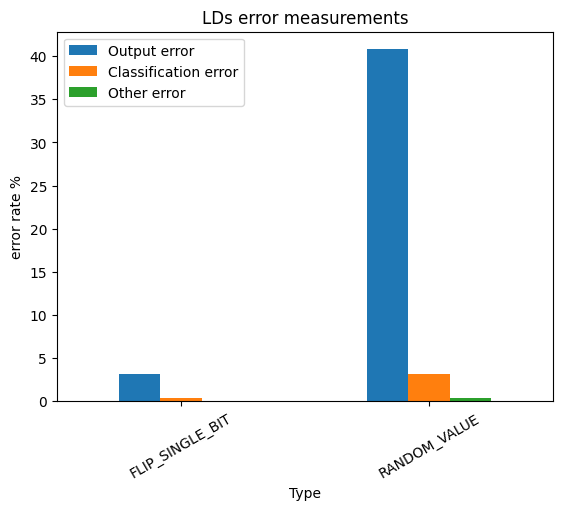

In [10]:
df_fp32 = df[df["Group"] == "fp32"]
df_gp = df[df["Group"] == "gp"]
df_ld = df[df["Group"] == "ld"]

df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_ld.index = df_ld["Type"]

df_fp32.plot(kind="bar", ylabel="error rate %", title="FP32 error measurements", rot=30)
df_gp.plot(kind="bar", ylabel="error rate %", title="GP error measurements", rot=30)
df_ld.plot(kind="bar", ylabel="error rate %", title="LDs error measurements", rot=30)

In [11]:
df_kernels = pd.read_csv("./results_kernel.csv")
df_kernels.columns = ["Kernel", *df_kernels.columns[1:]]
df_kernels

,Kernel,Output error,Classification error,Masked,Other error
0,volta_sgemm_128x64_tn,203,30,621,21
1,volta_sgemm_128x32_tn,209,0,502,12
2,voidattention_kernel_batched<AttentionKernel<f...,40,0,125,15
3,cudnn_volta_scudnn_128x64_relu_xregs_large_nn_v1,0,0,2,1
4,voidat::native::vectorized_elementwise_kernel<...,2,0,1,0
5,voidat::native::(anonymousnamespace)::vectoriz...,2,0,3,0
6,"voidat::native::elementwise_kernel<128,2,at::n...",0,0,0,4
7,voidat::native::vectorized_elementwise_kernel<...,1,0,3,0


<Axes: xlabel='Kernel'>

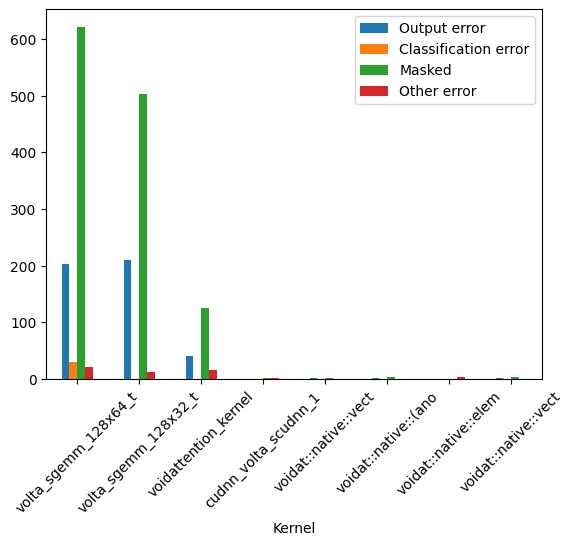

In [12]:
df_kernels.index = pd.Series([k[:20] for k in df_kernels["Kernel"]], name="Kernel")
df_kernels.plot(kind="bar", rot=45,)

In [20]:
df_cat = pd.read_csv("./results_cat.csv")
df_cat.columns = ["Group", "Type", *df_cat.columns[2:]]
df_cat

,Group,Type,SDC,Critical SDC,DUE
0,gp,FLIP_SINGLE_BIT,3.6,0.4,2.8
1,gp,RANDOM_VALUE,33.6,2.4,4.4
2,ld,FLIP_SINGLE_BIT,2.8,0.4,0.0
3,ld,RANDOM_VALUE,37.6,3.2,0.4
4,fp32,FLIP_SINGLE_BIT,3.2,0.4,0.0
5,fp32,RANDOM_VALUE,34.4,2.0,0.0
6,fp32,WARP_RANDOM_VALUE,55.6,3.2,0.0


In [24]:
df_fp32 = df_cat[df_cat["Group"] == "fp32"]
df_gp = df_cat[df_cat["Group"] == "gp"]
df_ld = df_cat[df_cat["Group"] == "ld"]

df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_ld.index = df_ld["Type"]

# df_fp32.plot(kind="bar", ylabel=f"% of error", title="FP32 error measurements (hardened)", rot=30, stacked=True)
# df_gp.plot(kind="bar", ylabel=f"% of error", title="GP error measurements (hardened)", rot=30, stacked=True)
# df_ld.plot(kind="bar", ylabel=f"% of error", title="LDs error measurements (hardened)", rot=30, stacked=True)


34.4